In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("../big_low_resource_test_160.csv")
df

,Unnamed: 0,test_name,acc,ductive,seed,unlabeled_amount,labeled_amount
0,0,2 layer GCN,0.875000,trans,0,40,160
1,1,3 layer GCN,0.875000,trans,0,40,160
2,2,2 layer GCN,0.850000,trans,0,40,160
3,3,3 layer GCN,0.800000,trans,0,40,160
4,4,2 layer GCN,0.850000,trans,0,40,160
...,...,...,...,...,...,...,...
1030,1030,2 layer GCN,0.871000,trans,14,4000,160
1031,1031,3 layer GCN,0.814500,trans,14,4000,160
1032,1032,3 layer GCN,0.849167,trans,14,6000,160
1033,1033,3 layer GCN,0.775667,trans,14,6000,160


In [56]:
# remove unfinished seeds
# seed_lim = 6
# df = df[df["seed"]<=seed_lim]

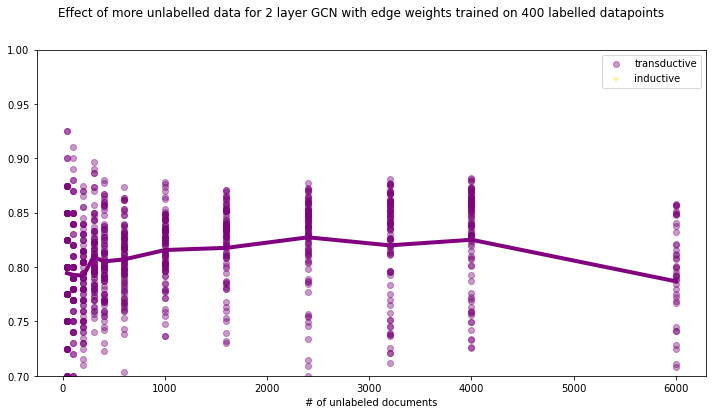

In [57]:
fig, ax = plt.subplots(1, figsize=(12, 6))

fig.suptitle("Effect of more unlabelled data for 2 layer GCN with edge weights trained on 400 labelled datapoints")

sub = df[(df["ductive"]=="trans")]
ax.scatter(sub["unlabeled_amount"], sub["acc"], color="purple", label="transductive", alpha=0.4)
sub = df[(df["ductive"]=="in")]
ax.scatter(sub["unlabeled_amount"], sub["acc"], color="gold", label="inductive", marker="+", alpha=0.4)

ax.set_ylim(0.7, 1)

# means
xs = []
mean_inductives = []
mean_transductives = []
for x, sub_df in df.groupby("unlabeled_amount"):
    xs.append(x)
    mean_inductives.append(sub_df[(sub_df["ductive"]=="in")]["acc"].mean())
    mean_transductives.append(sub_df[(sub_df["ductive"]=="trans")]["acc"].mean())

ax.plot(xs, mean_transductives, color="purple", linewidth=4)
ax.plot(xs, mean_inductives, color="gold", alpha=0.6, linewidth=4)

ax.set_xlabel("# of unlabeled documents")

plt.legend()
plt.show()

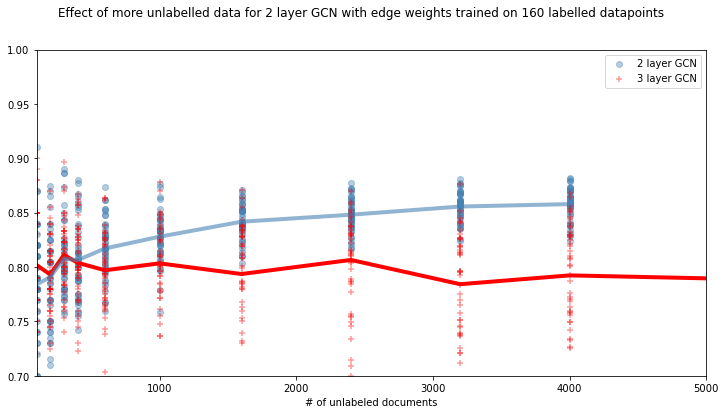

In [58]:
fig, ax = plt.subplots(1, figsize=(12, 6))

fig.suptitle("Effect of more unlabelled data for 2 layer GCN with edge weights trained on 160 labelled datapoints")

sub = df[(df["test_name"]=="2 layer GCN")]
ax.scatter(sub["unlabeled_amount"], sub["acc"], color="steelblue", label="2 layer GCN", alpha=0.4)
sub = df[(df["test_name"]=="3 layer GCN")]
ax.scatter(sub["unlabeled_amount"], sub["acc"], color="red", label="3 layer GCN", marker="+", alpha=0.4)

ax.set_ylim(0.7, 1)

# means
xs = []
mean_inductives = []
mean_transductives = []
for x, sub_df in df.groupby("unlabeled_amount"):
    xs.append(x)
    mean_inductives.append(sub_df[(sub_df["test_name"]=="2 layer GCN")]["acc"].mean())
    mean_transductives.append(sub_df[(sub_df["test_name"]=="3 layer GCN")]["acc"].mean())

ax.plot(xs, mean_transductives, color="red", linewidth=4)
ax.plot(xs, mean_inductives, color="steelblue", alpha=0.6, linewidth=4)

ax.set_xlabel("# of unlabeled documents")

ax.set_xlim(100, 5000)

plt.legend()
plt.show()

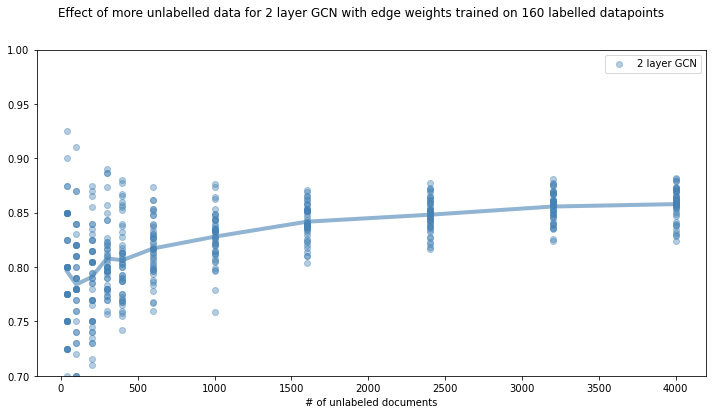

In [59]:
fig, ax = plt.subplots(1, figsize=(12, 6))

fig.suptitle("Effect of more unlabelled data for 2 layer GCN with edge weights trained on 160 labelled datapoints")

sub = df[(df["test_name"]=="2 layer GCN")]
ax.scatter(sub["unlabeled_amount"], sub["acc"], color="steelblue", label="2 layer GCN", alpha=0.4)
sub = df[(df["test_name"]=="3 layer GCN")]
# ax.scatter(sub["unlabeled_amount"], sub["acc"], color="red", label="3 layer GCN", marker="+", alpha=0.4)

ax.set_ylim(0.7, 1)

# means
xs = []
mean_inductives = []
mean_transductives = []
for x, sub_df in df.groupby("unlabeled_amount"):
    xs.append(x)
    mean_inductives.append(sub_df[(sub_df["test_name"]=="2 layer GCN")]["acc"].mean())
    mean_transductives.append(sub_df[(sub_df["test_name"]=="3 layer GCN")]["acc"].mean())

ax.plot(xs, mean_inductives, color="steelblue", alpha=0.6, linewidth=4)
# ax.plot(xs, mean_transductives, color="red", linewidth=4)

ax.set_xlabel("# of unlabeled documents")

plt.legend()
plt.show()

<ipython-input-60-8c139109afb2>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub = df2[(df["test_name"]=="2 layer GCN")]


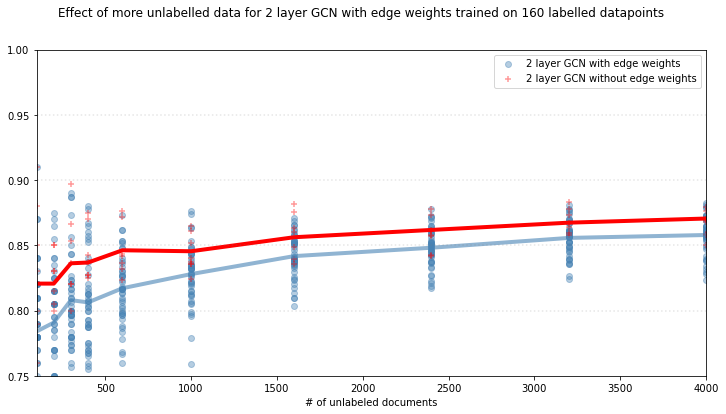

In [60]:
df2 = pd.read_csv("../big_low_resource_test_no_edge_weights.csv")
df2

fig, ax = plt.subplots(1, figsize=(12, 6))

fig.suptitle("Effect of more unlabelled data for 2 layer GCN with edge weights trained on 160 labelled datapoints")

sub = df[(df["test_name"]=="2 layer GCN")]
ax.scatter(sub["unlabeled_amount"], sub["acc"], color="steelblue", label="2 layer GCN with edge weights", alpha=0.4)

sub = df2[(df["test_name"]=="2 layer GCN")]
ax.scatter(sub["unlabeled_amount"], sub["acc"], color="red", label="2 layer GCN without edge weights", marker="+", alpha=0.4)

ax.set_ylim(0.75, 1)

# means
xs = []
mean_inductives = []
mean_transductives = []
for x, sub_df in df.groupby("unlabeled_amount"):
    xs.append(x)
    mean_inductives.append(sub_df[(sub_df["test_name"]=="2 layer GCN")]["acc"].mean())
    
xs2 = []
for x, sub_df in df2.groupby("unlabeled_amount"):
    xs2.append(x)
    mean_transductives.append(sub_df[(sub_df["test_name"]=="2 layer GCN")]["acc"].mean())

ax.plot(xs, mean_inductives, color="steelblue", alpha=0.6, linewidth=4)
ax.plot(xs2, mean_transductives, color="red", linewidth=4)

ax.set_xlabel("# of unlabeled documents")

ax.axhline(0.8, color='grey', alpha=0.2, ls=":")
ax.axhline(0.85, color='grey', alpha=0.2, ls=":")
ax.axhline(0.9, color='grey', alpha=0.2, ls=":")
ax.axhline(0.95, color='grey', alpha=0.2, ls=":")

ax.set_xlim(100, 4000)

plt.legend()
plt.show()

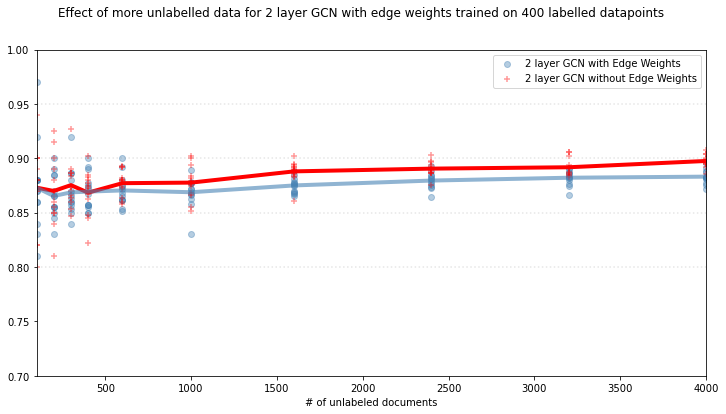

In [62]:
df = pd.read_csv("../big_low_resource_400.csv")
df

fig, ax = plt.subplots(1, figsize=(12, 6))

fig.suptitle("Effect of more unlabelled data for 2 layer GCN with edge weights trained on 400 labelled datapoints")

sub = df[(df["test_name"]=="2 layer GCN")]
ax.scatter(sub["unlabeled_amount"], sub["acc"], color="steelblue", label="2 layer GCN with Edge Weights", alpha=0.4)
sub = df[(df["test_name"]=="2 layer GCN without Edge Weights")]
ax.scatter(sub["unlabeled_amount"], sub["acc"], color="red", label="2 layer GCN without Edge Weights", marker="+", alpha=0.4)

ax.set_ylim(0.7, 1)

# means
xs = []
mean_inductives = []
mean_transductives = []
for x, sub_df in df.groupby("unlabeled_amount"):
    xs.append(x)
    mean_inductives.append(sub_df[(sub_df["test_name"]=="2 layer GCN")]["acc"].mean())
    mean_transductives.append(sub_df[(sub_df["test_name"]=="2 layer GCN without Edge Weights")]["acc"].mean())

ax.plot(xs, mean_transductives, color="red", linewidth=4)
ax.plot(xs, mean_inductives, color="steelblue", alpha=0.6, linewidth=4)

ax.set_xlabel("# of unlabeled documents")

ax.axhline(0.8, color='grey', alpha=0.2, ls=":")
ax.axhline(0.85, color='grey', alpha=0.2, ls=":")
ax.axhline(0.9, color='grey', alpha=0.2, ls=":")
ax.axhline(0.95, color='grey', alpha=0.2, ls=":")

ax.set_xlim(100, 4000)

plt.legend()
plt.show()